<a href="https://colab.research.google.com/github/helymenezes/Colab/blob/CDPROM03/curva_saturacao_bateria_bms_120d__2_padroniza%C3%A7%C3%A3o_normalizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDO DE CASO BATERIA BMS _100_2

USANDO REGRESSÃO LOGÍSTICA


### Algoritmo Linear. O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

# PROBLEMA DE NEGÓCIO:

#### Problema de negócio, prever a curva de saturação da bateria.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando bibliotecas que irei usar
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#carregamento de dados do datalogger
datalog_base = pd.read_csv(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/ARQUIVOS.CSV/CONTROLADOR CO (120 DIAS)_cop.csv', sep = ',')


# Análise Exploratória dos dados









In [4]:
# Visualizando o dataset
datalog_base.head(3)

,,,,,Days Ago,Min Battery Volt.(V),Max Battery Volt.(V),Max Charge Curr.(A),Max Discharge Curr.(A),Max Charge Power(W),Max Discharge Power(W),Charge Ah,Discharge Ah,Charge KWh,Discharge KWh
120.0,26.0,2.0,28.0,5.0,34.0,21.0,0.0,0.0,944.0,0.0,111.0,0.0,3.0,63.0,0.0
119.0,26.0,7.0,28.0,5.0,32.0,47.0,0.0,0.0,899.0,0.0,82.0,0.0,2.0,268.0,0.0
118.0,26.0,4.0,28.0,5.0,32.0,89.0,0.0,0.0,901.0,0.0,107.0,0.0,2.0,968.0,0.0


In [5]:
#Realizando o tratamento do dataset com informações mais interessantes para avaliação.
datalog_base = datalog_base.reset_index()
datalog_base = datalog_base.set_index('level_0')
datalog_base = datalog_base.drop(['level_1','level_2','level_3','level_4','Max Battery Volt.(V)','Max Charge Curr.(A)','Max Charge Power(W)','Charge Ah','Discharge KWh'], axis=1)
datalog_base.head(3)



,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
level_0,,,,,,
120.0,34.0,21.0,944.0,111.0,3.0,63.0
119.0,32.0,47.0,899.0,82.0,2.0,268.0
118.0,32.0,89.0,901.0,107.0,2.0,968.0


In [6]:
# verificar a estrutura da tabela quantidade de colunas e linhas. (linhas, colunas)
datalog_base.shape

(121, 6)

In [7]:
# Verificar valores ausentes (Missing)
datalog_base.isnull().sum() # avaliar valores nulos e soma-lo " indenficar informações nulos para excluir.(Valores missing ou valores ausentes)"

Days Ago                  62
Min Battery Volt.(V)      62
Max Discharge Curr.(A)    62
Max Discharge Power(W)    62
Discharge Ah              62
Charge KWh                62
dtype: int64

In [8]:
#  "Eliminá-los" (neste caso não existe valores ausentes conforme informado na análise exploratória de dados, então não é preciso elimina-los)
datalog_base.dropna(inplace=True)
datalog_base.shape

(59, 6)

In [9]:
# Buscar informações e parâmetros dos dados (dtype)
datalog_base.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 59 entries, 120.0 to 62.0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                59 non-null     float64
 1   Min Battery Volt.(V)    59 non-null     float64
 2   Max Discharge Curr.(A)  59 non-null     float64
 3   Max Discharge Power(W)  59 non-null     float64
 4   Discharge Ah            59 non-null     float64
 5   Charge KWh              59 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


In [10]:
datalog_base.nunique() #Nunique() apresenta o numero todad de VALORES UNICOS em cada coluna do dataframe.

Days Ago                  27
Min Battery Volt.(V)      40
Max Discharge Curr.(A)    58
Max Discharge Power(W)    49
Discharge Ah               5
Charge KWh                56
dtype: int64

In [11]:
datalog_base.describe()# realização de informações estatítica para comparação média com a mediana.


,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,27.983051,51.118644,786.881356,89.237288,1.983051,399.898305
std,10.849267,28.656157,299.664933,44.740762,1.224626,321.974977
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,24.500000,26.000000,689.000000,58.000000,1.000000,93.500000
50%,32.000000,53.000000,887.000000,103.000000,2.000000,372.000000
75%,35.000000,77.000000,995.000000,122.000000,3.000000,692.000000
max,44.000000,95.000000,1238.000000,154.000000,4.000000,977.000000


In [ ]:
datalog_base.duplicated().sum # é a soma total de dados duplicados.

In [13]:
data = datalog_base.drop_duplicates(subset=['Max Discharge Curr.(A)','Charge KWh'])
#data['Charge KWh'].duplicated().sum
data.shape

(59, 6)

In [ ]:
data['Charge KWh'].value_counts()# Mostra quais valores são unicos.

In [ ]:
data.astype('float') # Convertendo para valores int64 para float

In [15]:
#Calcular a correlação
datalog_corr = data.corr()
datalog_corr

,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
Days Ago,1.000000,0.003778,0.998783,0.733346,0.672177,0.217403
Min Battery Volt.(V),0.003778,1.000000,0.033457,0.002049,0.015289,-0.159282
Max Discharge Curr.(A),0.998783,0.033457,1.000000,0.745161,0.685558,0.215490
Max Discharge Power(W),0.733346,0.002049,0.745161,1.000000,0.968022,0.289614
Discharge Ah,0.672177,0.015289,0.685558,0.968022,1.000000,0.086924
Charge KWh,0.217403,-0.159282,0.215490,0.289614,0.086924,1.000000


<Axes: >

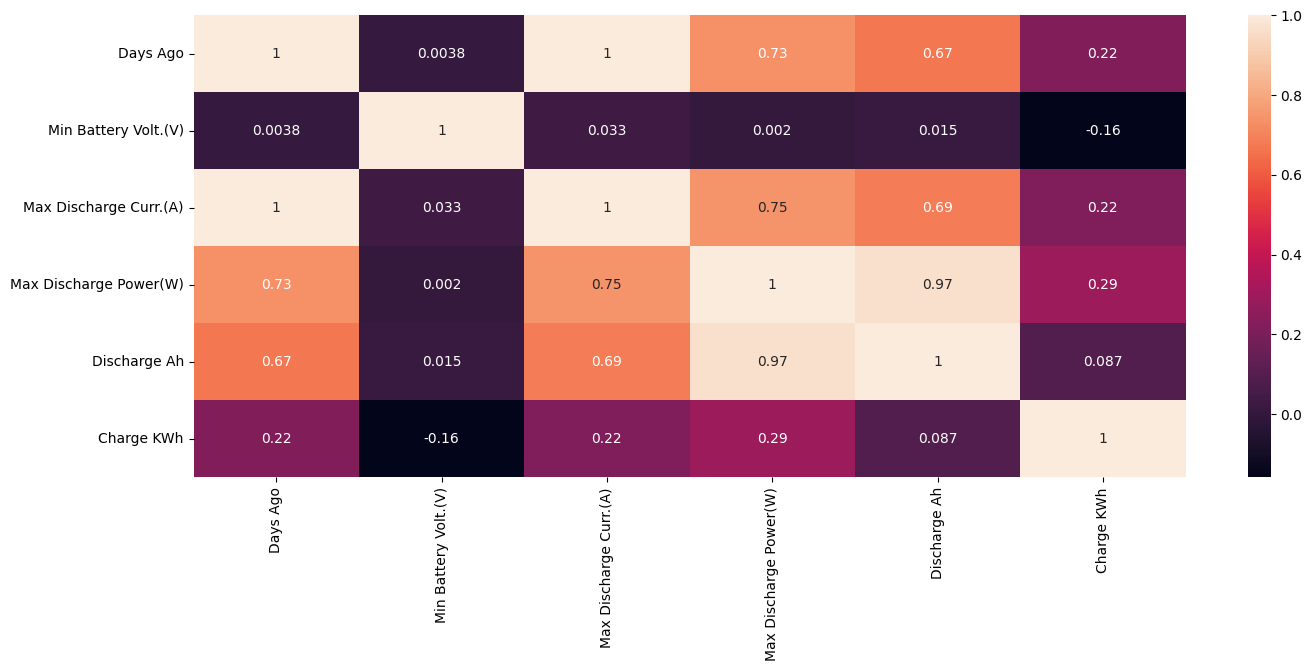

In [16]:
# Usando o método heatmap do seaborn

plt.figure(figsize=(16,6))
sns.heatmap(data=datalog_corr, annot=True)

### Usando Pandas profiling para avaliação geral.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profiling = ProfileReport(datalog_base,title= 'Relatório - Pandas Profiling', html={'style':{'full_width':True}} )

In [ ]:
profiling
# Traducao das colunas do dataset
#  0   Days Ago / dias atrás
#  1   Min Battery Volt.(V)  /  Volt Mínimo Da Bateria (V)
#  2   Max Discharge Curr.(A) / Corrente de descarga máxima (A)
#  3   Max Discharge Power(W) / Potência máxima de descarga (W)
#  4   Discharge Ah / 4 Descarga Ah
#  5   Charge KWh / Carga KWh


### Criando Graficos manualmente sem o Pandas Profiling

## Usado gáficos matplotlib "px"

In [17]:
#Importar ploty
import plotly.express as px

In [18]:
# Correlação entre Quantidade_ciclo x Carg
fig = px.scatter(data,x='Days Ago',y='Charge KWh')
fig.show()

In [19]:
# Correlação entre descarga max(P) x Carga(Kw/h)
fig = px.scatter(data,x='Max Discharge Power(W)',y='Charge KWh')
fig.show()

In [20]:
data['Charge KWh'].describe()

count     59.000000
mean     399.898305
std      321.974977
min        0.000000
25%       93.500000
50%      372.000000
75%      692.000000
max      977.000000
Name: Charge KWh, dtype: float64

In [21]:
import plotly.figure_factory as ff


In [22]:
labels = ['Distribuição de variável  Max Discarga (Killo_watts)']
fig = ff.create_distplot([data['Charge KWh']],labels, bin_size= .2)
fig.show()

In [23]:
from scipy import stats
stats.skew(data['Charge KWh'])

0.29565762117093936

In [24]:
#Histograma da variável Charge Kwh
fig = px.histogram(data, x= "Max Discharge Curr.(A)", nbins=50, opacity=0.50)
fig.show()

In [27]:
data.columns

Index(['Days Ago', 'Min Battery Volt.(V)', 'Max Discharge Curr.(A)',
       'Max Discharge Power(W)', 'Discharge Ah', 'Charge KWh'],
      dtype='object')

In [32]:
#Visualizando outliers na Variável Carga
import plotly.express as px

fig = px.box(data, y='Charge KWh')
fig.update_layout(width= 800, height= 800)
fig.show()

In [33]:
datalog_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Days Ago to Charge KWh
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                6 non-null      float64
 1   Min Battery Volt.(V)    6 non-null      float64
 2   Max Discharge Curr.(A)  6 non-null      float64
 3   Max Discharge Power(W)  6 non-null      float64
 4   Discharge Ah            6 non-null      float64
 5   Charge KWh              6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


## Usando gráficos Seanborn "sns"

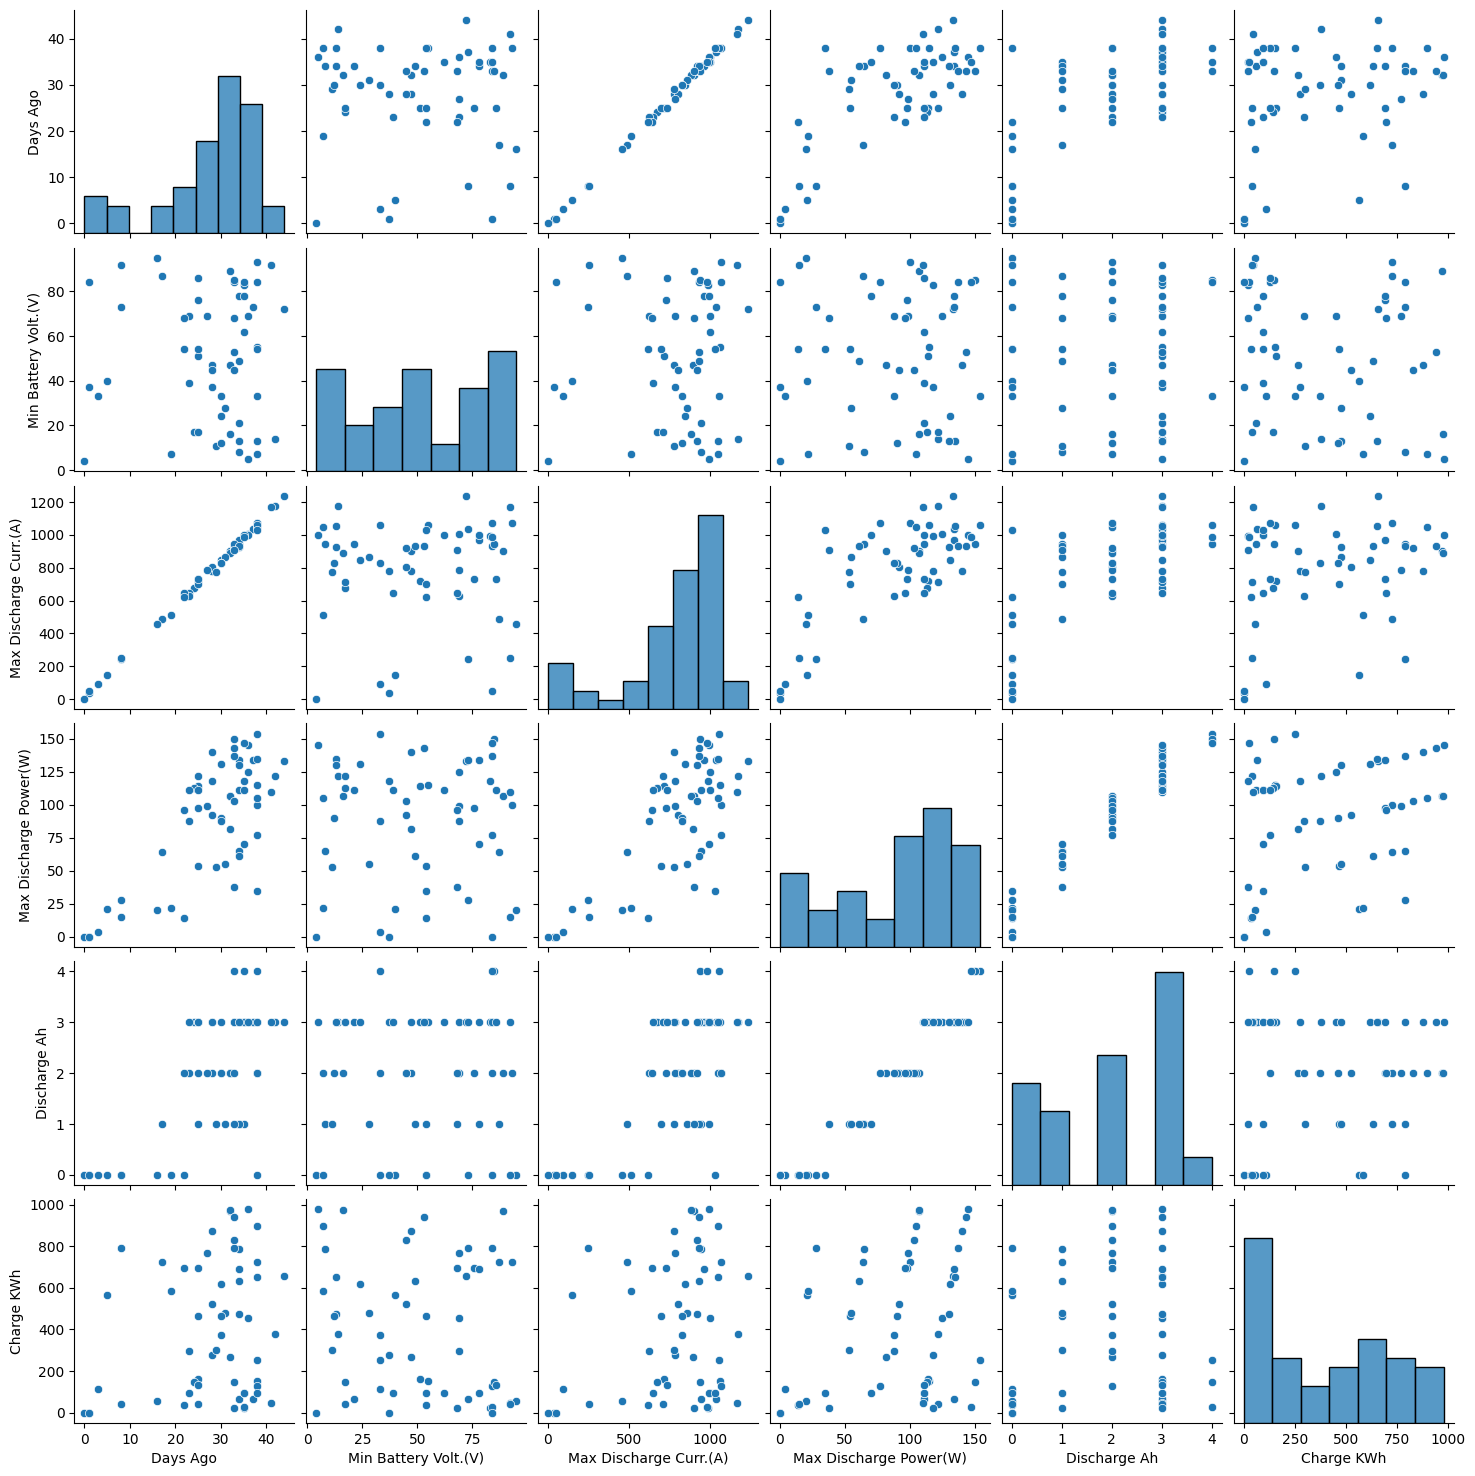

In [34]:
sns.pairplot(data)

In [35]:
# estatistica descritivas de outras variáveis
data[['Min Battery Volt.(V)','Min Battery Volt.(V)','Max Discharge Curr.(A)','Max Discharge Power(W)','Discharge Ah']].describe()

,Min Battery Volt.(V),Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,51.118644,51.118644,786.881356,89.237288,1.983051
std,28.656157,28.656157,299.664933,44.740762,1.224626
min,4.000000,4.000000,1.000000,0.000000,0.000000
25%,26.000000,26.000000,689.000000,58.000000,1.000000
50%,53.000000,53.000000,887.000000,103.000000,2.000000
75%,77.000000,77.000000,995.000000,122.000000,3.000000
max,95.000000,95.000000,1238.000000,154.000000,4.000000


# **Pré_Processamento de dados do dataset da bateria**


### Importando Bibliotecas

In [64]:
# Importando bibliotecas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [65]:
array = data.values

In [66]:
#  Separando o array em componentes de input e output
X = array[:,0:3]
Y = array[:,5]


In [ ]:
X

### Pré Processamento com Padronizão



In [78]:
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [ ]:
standardX

### Pré Processamento com Normalização

In [71]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


In [ ]:
rescaledX

### Separando dados  para regressão linear Multinear


In [86]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = datalog_base[['Charge KWh','Max Discharge Power(W)','Max Discharge Curr.(A)']]
y = datalog_base['Days Ago'].values

In [87]:
#Realizar a separação dos dados dataset entre 80% treino e e 20% para validação.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# **Criação da Máquina preditiva**




### Criando um modelo de maquina preditiva de regressão múltipla

In [80]:
#Construindo o modelo de Regreção mútipla
model = LinearRegression()


In [88]:
#Treina o modelo
model_multi = model.fit(X_train, y_train)

In [91]:
# Novas Previsões
prevision = model_multi.predict(X_test)
prevision

array([32.99605622, 23.54663889, -0.60599468, 41.94233444, 36.79911596,
       34.72978294, 37.54631734, 17.07585025, 22.5475437 , 35.2608156 ,
       35.94766434, 32.70730601])

### Criando um modelo de máquina preditiva usando Regressão logistica

In [73]:
# Definindo os valores para o número de folds
num_folds = 5
random_state = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

In [74]:
# Criando um modelo com Regreçaõ Logistica
model_regressionlogistic = LogisticRegression()

In [75]:
# Validação Cruzada com normalização (Cross Validation / standardX)

result = cross_val_score(model_regressionlogistic,standardX, Y, cv= kfold)


In [76]:
result = cross_val_score(model_regressionlogistic,rescaledX, Y, cv= kfold)

# Avaliando o desempenho da máquina preditiva Simples e Multipla

### *Regressão Simples e Multipla*

In [92]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test,prevision )

0.996878870000148

In [ ]:
# Compara valor real e valor predito
saturacao_predita = pd.DataFrame({'Real': y_test.flatten(), 'Saturacao':prevision.flatten()})
saturacao_predita.sample(5)

In [ ]:
# Evaluate model - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (model.score(X_test, y_test)*100), '%' )

Acurácia: 99.69 %


<Figure size 640x480 with 0 Axes>

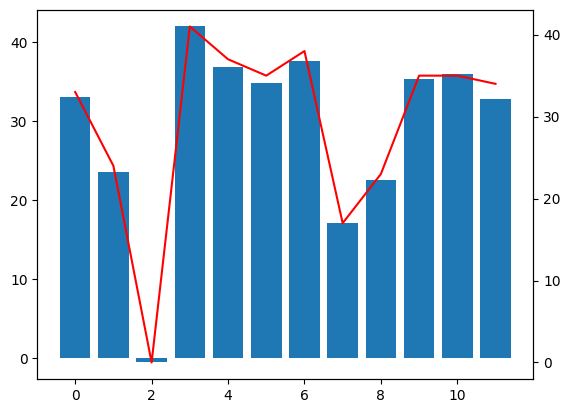

In [ ]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(saturacao_predita.index,saturacao_predita['Saturacao'])
plt.xticks(rotation=90)
ax2.plot(saturacao_predita.index,saturacao_predita['Real'],color='r')
plt.show()

## *Regressão Logistica*

*** Não é muito recomendado ***

In [77]:
# Print do resultado
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 3.333


# Decorrente a correlação entre ciclos de cargas mais as variáveis
Charge KWh
Max Discharge Power(W)
Max Discharge Curr.(A)
Pode se dizer que a bateria saturou por alguma ocasião no ciclo 02;
Havendo uma previsão de falha no sétimo ciclo, sendo que uma ação corretiva foi realizada para conter a descarga profunda da bateria.

# SALVANDO DADOS EM EXCEL PARA AVALIAR EM PLANILHA.


In [ ]:
dataframe_excel = pd.ExcelWriter(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/data.xlsx')
data.to_excel(dataframe_excel)
dataframe_excel.save()

